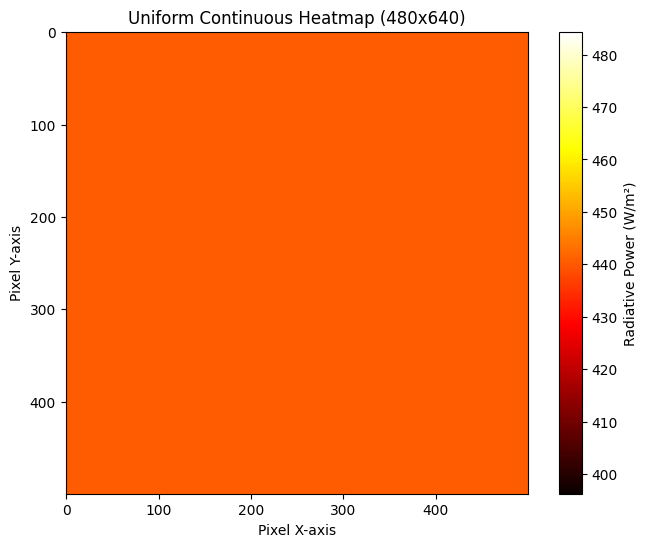

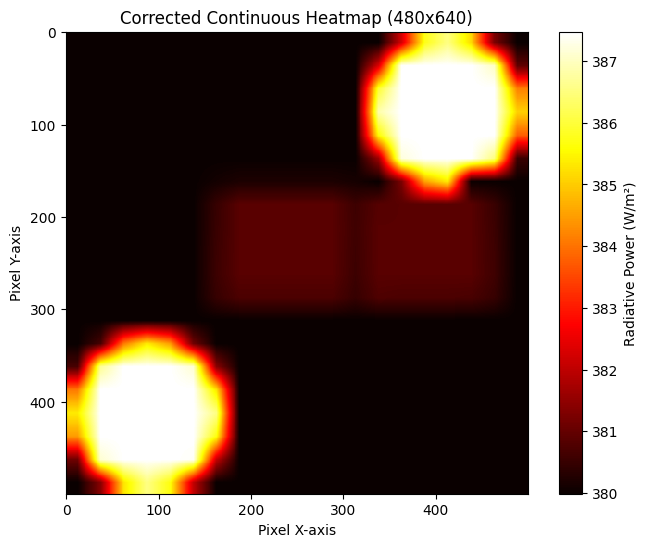

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the Stefan-Boltzmann constant (W·m⁻²·K⁻⁴)
STEFAN_BOLTZMANN_CONSTANT = 5.670374419e-8

# Define the default uniform temperature (K)
DEFAULT_TEMPERATURE = 296.85   # Kelvin

# Define the resolution for both continuous and discrete heatmaps
continuous_shape = (500, 500)  # Continuous 480x640 heatmap
m, n = 20, 20  # Discrete heatmap 15x20

# Step 1: Generate the uniform heatmap (in Kelvin)
continuous_heatmap = np.full(continuous_shape, DEFAULT_TEMPERATURE, dtype=np.float32)

def temperature_to_radiance(temp_matrix):
    """
    Convert temperature (Kelvin) to radiative power (W/m²) using Stefan-Boltzmann's Law.
    """
    return STEFAN_BOLTZMANN_CONSTANT * (temp_matrix ** 4)

def visualize_heatmap(matrix, title, colorbar_label, cmap='hot'):
    """
    Display a heatmap for a given matrix with appropriate axis labels.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(label=colorbar_label)
    plt.xlabel("Pixel X-axis")
    plt.ylabel("Pixel Y-axis")
    plt.title(title)
    plt.show()

# Convert to radiative power
radiance_continuous_heatmap = temperature_to_radiance(continuous_heatmap)

# Visualize the continuous heatmap (in W/m²)
visualize_heatmap(radiance_continuous_heatmap, "Uniform Continuous Heatmap (480x640)", "Radiative Power (W/m²)")

# Step 2: Convert to discrete heatmap
cell_height, cell_width = continuous_shape[0] // m, continuous_shape[1] // n
discrete_heatmap = np.zeros((m, n), dtype=np.float32)

for i in range(m):
    for j in range(n):
        y_start, y_end = i * cell_height, (i + 1) * cell_height
        x_start, x_end = j * cell_width, (j + 1) * cell_width
        block = continuous_heatmap[y_start:y_end, x_start:x_end]
        discrete_heatmap[i, j] = np.mean(block)  # Assign uniform temperature to each block

# Convert discrete heatmap to radiance
radiance_discrete_heatmap = temperature_to_radiance(discrete_heatmap)

# Step 3: Load the emissivity matrix
emissivity_matrix = np.load("emissivity_matrix2.npy")  # Load previously saved emissivity matrix
emissivity_matrix_old = np.load("emissivity_matrix.npy")  # Load previously saved emissivity matrix


#emissivity_matrix=emissivity_matrix*0

#emissivity_matrix=emissivity_matrix+0.863

# Resize emissivity matrix to match the continuous heatmap
emissivity_resized = cv2.resize(emissivity_matrix, (continuous_shape[1], continuous_shape[0]), interpolation=cv2.INTER_LINEAR)

# Apply emissivity correction to both heatmaps
corrected_radiance_continuous_heatmap = radiance_continuous_heatmap * emissivity_resized
corrected_radiance_discrete_heatmap = radiance_discrete_heatmap * emissivity_matrix

# Visualize the emissivity-corrected continuous heatmap (in W/m²)
visualize_heatmap(corrected_radiance_continuous_heatmap, "Corrected Continuous Heatmap (480x640)", "Radiative Power (W/m²)")


# Save the corrected heatmaps for future use
np.save("corrected_radiance_continuous_heatmap.npy", corrected_radiance_continuous_heatmap)
np.save("corrected_radiance_discrete_heatmap.npy", corrected_radiance_discrete_heatmap)



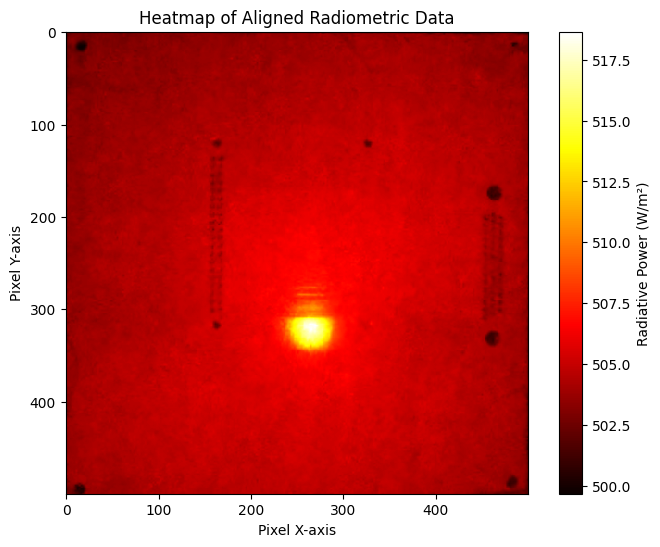

In [3]:
# Step 4: Process and visualize aligned radiometric data
aligned_radiometric_data = np.load("aligned_radiometric_data.npy")  # Load previously saved data




# Visualize the aligned radiometric data in radiative power
visualize_heatmap(aligned_radiometric_data, "Heatmap of Aligned Radiometric Data", "Radiative Power (W/m²)")

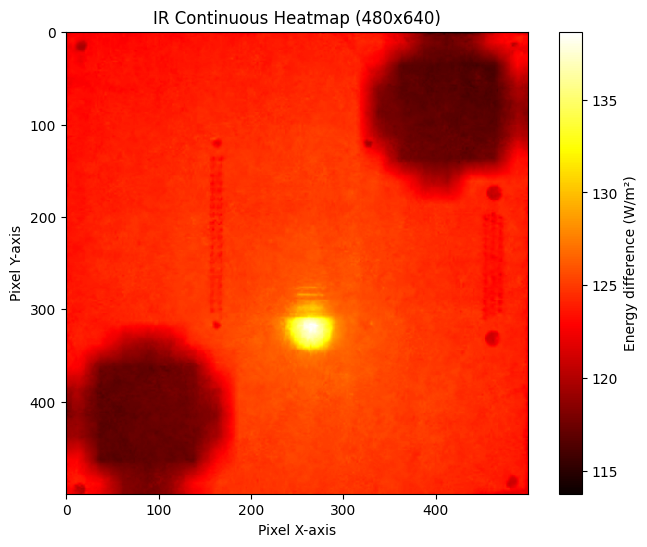

In [4]:
# Step 1: Compute the IR heatmaps
IR_continuous = aligned_radiometric_data - corrected_radiance_continuous_heatmap


# Step 2: Visualize the results
visualize_heatmap(IR_continuous, "IR Continuous Heatmap (480x640)", "Energy difference (W/m²)")

np.save("IR_continuous.npy", IR_continuous)



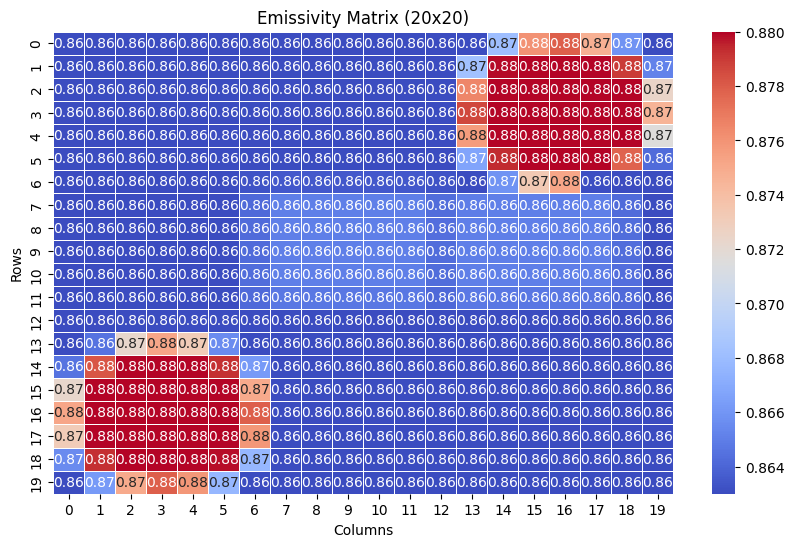

In [6]:

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(emissivity_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("Emissivity Matrix (20x20)")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Save as image (optional)
plt.savefig("emissivity_matrix_old_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()


